In [2]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

import scipy.io
import time
import glob,os
from scipy import optimize
from pylab import *
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import bz2
import csv
import struct

## Calculate precision from JDDC results

In [21]:
# 3 iterations
print(prec_x_list.mean())
print(prec_y_list.mean())

0.4551623879436304
0.4848352116467467


In [17]:
# 2 iterations
print(prec_x_list.mean())
print(prec_y_list.mean())

0.4339702214153335
0.42433646596358343


In [8]:
# 1 iteration
print(prec_x_list.mean())
print(prec_y_list.mean())

0.4672658666965863
0.5461900118395038


0.654
(0.4636874224546431, 0.46367537061104885)
0.493
(0.3994373697568586, 0.42906544352806036)
0.63
(0.4871155059642362, 0.5007455067140716)
0.494
(0.43949472059753586, 0.41056747032114044)
0.503
(0.4723321063275291, 0.47555557637233153)
0.502
(0.4268855200627323, 0.46655197752493305)
0.496
(0.4284976657487812, 0.5134802358933213)
0.495
(0.4501630821208411, 0.5113409179618679)
0.51
(0.49212047047477786, 0.48418769402393785)
0.645
(0.46174676827261585, 0.3662455437902601)


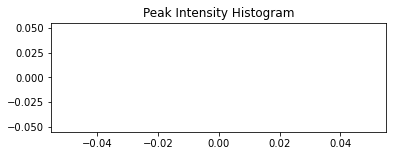

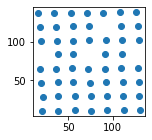

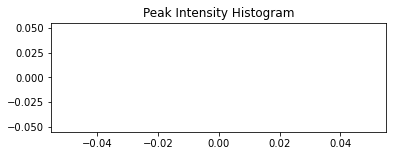

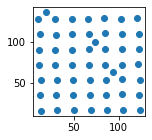

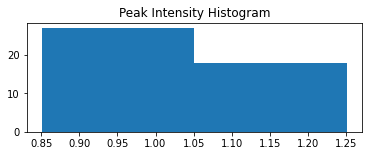

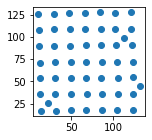

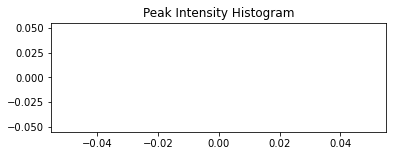

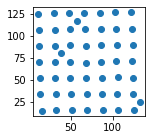

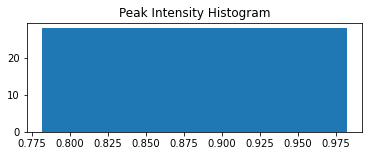

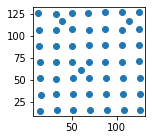

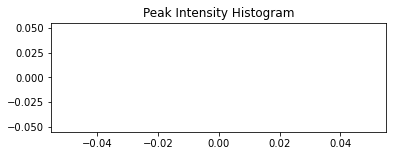

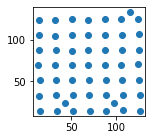

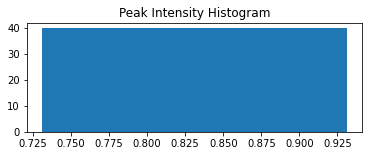

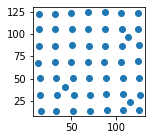

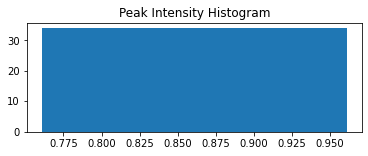

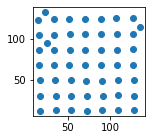

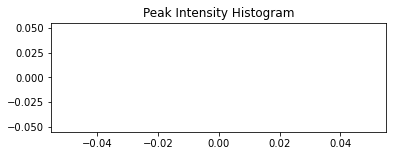

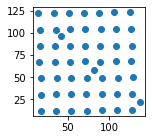

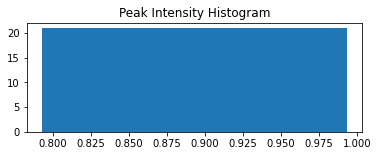

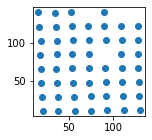

In [6]:
path = 'D:/2020/JDDC/DoseTest_exp/2Frames/'
list_2 = glob.glob(path + '2Frames*results/')
prec_x_list = np.zeros((len(list_2),1))
prec_y_list = np.zeros((len(list_2),1))
count = 0

for j in range(len(list_2)):
    path_final = list_2[j]
    csvfile = path_final + 'bump-0_003-centers.csv'
    txtfile = path_final + 'bump-0_003.txt'
    prec = FindPrecision(csvfile, txtfile, 0.7, 18)
    print(prec)
    if ~isnan(prec).any():
        prec_x_list[j]=prec[0]
        prec_y_list[j]=prec[1]
#     count = count + 1

D:/2020/JDDC/DoseTest_exp/2Frames/Y2Test/50Y2\2Frames_B9_results\
0.7


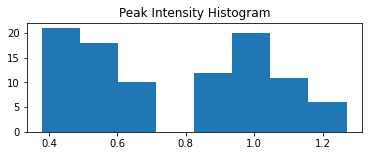

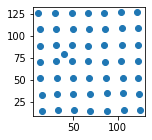

In [19]:
j = 7
path_final = list_2[j]
print(path_final)
csvFileName = path_final + 'bump-0_003-centers.csv'
txtFileName = path_final + 'bump-0_003.txt'
separation = 18

start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        peaks_x.append(float(row[0]))
        peaks_y.append(float(row[1]))

with open(txtFileName) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content];

peaks_int = []
for i in range(len(peaks_x)):
    peaks_int.append(float(content[i*3+2]))

array_x = np.asarray(peaks_x)
array_y = np.asarray(peaks_y)
array_int = np.asarray(peaks_int)
index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140) & (array_int>0))
array_x = array_x[index]
array_y = array_y[index]
array_int = array_int[index]

fig = plt.subplots(figsize=(6,2))
plt.hist(array_int, bins='auto')
plt.title('Peak Intensity Histogram')

hist_bin = np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2)
hist, bin_edges = np.histogram(array_int,bins=np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2), density=True)
threshold = bin_edges[argmin(hist)]
threshold = 0.7
print(threshold)
lattice1 = np.where(array_int>threshold)
array_x1 = array_x[lattice1]
array_y1 = array_y[lattice1]
array_int1 = array_int[lattice1]

fig = plt.subplots(figsize=(2,2))
plt.scatter(array_x1,array_y1)

prec_x_list[j]=FindYStd(array_x1,array_y1,separation)
prec_y_list[j]=FindXStd(array_x1,array_y1,separation)

In [7]:
np.save(path+'prec_x_jddc.npy',prec_x_list)
np.save(path+'prec_y_jddc.npy',prec_y_list)

## Calculate precsion from NRR resutls

E:/JDDC/DoseTest_exp\10Frames\
(0.28440759358389295, 0.26925319808920484)
(0.30756491671151637, 0.33049262190018247)
(0.3312017013393353, 0.3591255427237538)
(0.3042138437398532, 0.27994835174139415)
(0.3028561809832479, 0.2911426947302968)
(0.2627320356643706, 0.2946355201169902)
(0.27785812614962113, 0.3464801887989741)
(0.28165948191006007, 0.29363230047256367)
(0.3457070930668619, 0.22037927762293147)
(0.3389894487079086, 0.31045434526642607)
E:/JDDC/DoseTest_exp\2Frames\
(0.44095314837608185, 0.6294156146340294)
(0.46135532489937914, 0.5611626971814718)
(0.5875711387681725, 0.5439695996336583)
(0.5187857559172923, 0.6787538857035742)
(0.5352584419512575, 0.47956121784226374)
(0.5290852465544845, 0.5555942533977296)
(0.6856106422908449, 0.6358854280919398)
(0.669585717772242, 0.6960551352283325)
(0.6040183118307612, 0.5629218803822728)
E:/JDDC/DoseTest_exp\3Frames\
(0.4695971743218558, 0.4157479219457133)
(0.40300692623218054, 0.490955060828073)
(0.47892186972042433, 0.503309725257

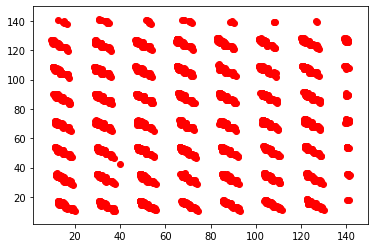

In [43]:
path = 'E:/JDDC/DoseTest_exp/*Frames/'
folder_list = glob.glob(path)
for ifolder in range(len(folder_list)):
    fullpath = folder_list[ifolder]
    prec_x_list = []
    prec_y_list = []
    count = 0
    list_2 = glob.glob(fullpath + 'NRR*/')
    print(fullpath)
    for j in range(len(list_2)):
        path_final = list_2[j]
        path_img = path_final + 'average.q2bz'
        path_nSamples = path_final + 'numSamples.q2bz'
        img = LoadImage(path_img)
        img = img[53:204,53:204]
        nSamples = LoadNumSamples(path_nSamples)
        nSamples = nSamples[53:204,53:204]
        prec = PrecisionFromFitting(img, nSamples)
        print(prec)
        prec_x_list.append(prec[0])
        prec_y_list.append(prec[1])
    
    np.save(fullpath+'prec_x_nrr.npy',prec_x_list)
    np.save(fullpath+'prec_y_nrr.npy',prec_y_list)

## Plot results

In [2]:
# Process precision calculated from JDDC and NRR results, calculate average precision and standard deviation
path = 'E:/JDDC/DoseTest_exp/*Frames/'
folder_list = glob.glob(path)
# Create two arrays to save precision and standard deviation for both jddc and nrr
prec_jddc = np.zeros((len(folder_list),4))
prec_nrr = np.zeros((len(folder_list),4))
# Create an array to save the number of frames
nframes = np.zeros((len(folder_list),1))

for ifolder in range(len(folder_list)):
    fullpath = folder_list[ifolder]
    prec_x_list = np.load(fullpath + 'prec_x_jddc.npy')
    prec_y_list = np.load(fullpath + 'prec_y_jddc.npy')
    prec_jddc[ifolder,0] = np.mean(prec_x_list)
    prec_jddc[ifolder,1] = np.std(prec_x_list)
    prec_jddc[ifolder,2] = np.mean(prec_y_list)
    prec_jddc[ifolder,3] = np.std(prec_y_list)
    
    prec_x_list = np.load(fullpath + 'prec_x_nrr.npy')
    prec_y_list = np.load(fullpath + 'prec_y_nrr.npy')
    prec_nrr[ifolder,0] = np.mean(prec_x_list)
    prec_nrr[ifolder,1] = np.std(prec_x_list)
    prec_nrr[ifolder,2] = np.mean(prec_y_list)
    prec_nrr[ifolder,3] = np.std(prec_y_list)
    
    nframes[ifolder,0] = int(fullpath.split('/')[-1][13:-7])
    print(fullpath, fullpath.split('/')[-1][13:-7])

E:/JDDC/DoseTest_exp\10Frames\ 10
E:/JDDC/DoseTest_exp\2Frames\ 2
E:/JDDC/DoseTest_exp\3Frames\ 3
E:/JDDC/DoseTest_exp\4Frames\ 4
E:/JDDC/DoseTest_exp\5Frames\ 5
E:/JDDC/DoseTest_exp\6Frames\ 6
E:/JDDC/DoseTest_exp\7Frames\ 7
E:/JDDC/DoseTest_exp\8Frames\ 8
E:/JDDC/DoseTest_exp\9Frames\ 9


In [3]:
prec_nrr

array([[0.30371904, 0.02643171, 0.2995544 , 0.03811564],
       [0.55913597, 0.080033  , 0.59370219, 0.06643689],
       [0.45701549, 0.04180533, 0.4803533 , 0.05876908],
       [0.40148758, 0.05581168, 0.43619554, 0.05979861],
       [0.36604082, 0.03499326, 0.39625593, 0.03848508],
       [0.35161813, 0.03699406, 0.37632516, 0.03099641],
       [0.32238666, 0.02346684, 0.35977787, 0.05535928],
       [0.32239761, 0.02299134, 0.32675777, 0.05716655],
       [0.32002812, 0.0247388 , 0.31716889, 0.0668488 ]])

Text(0.5, 0, 'Number of frames')

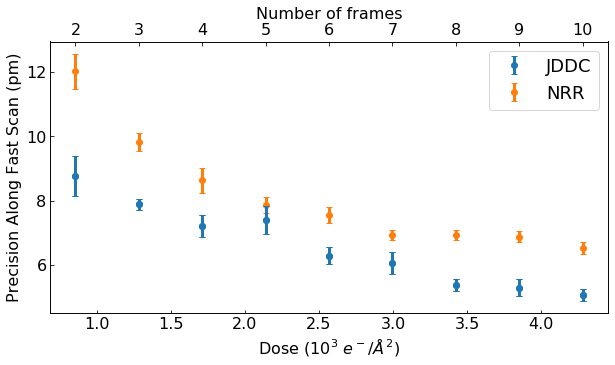

In [4]:
fig, ax1 = plt.subplots(figsize=(10,5))


# Axes1: bottom x axis, for plot, in unit electron dose
ax1.errorbar(nframes*0.428,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
ax1.errorbar(nframes*0.428,prec_nrr[:,0]*21.5,yerr = prec_nrr[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='NRR')
ax1.tick_params(labelsize=16, direction='in')
legend = ax1.legend(fontsize=18)

ax1.set_xlabel('Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax1.set_ylabel('Precision Along Fast Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

# Axis 2, on top, for display only, in unit of number of frames
ax2 = ax1.twiny()
ax2.errorbar(nframes,prec_jddc[:,0]*21.5,yerr = prec_jddc[:,1]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
# ax2.set_xticklabels(labels,fontsize=16)
ax2.tick_params(labelsize=16, direction='in')
ax2.set_xlabel('Number of frames',fontsize=16)

Text(0.5, 0, 'Number of frames')

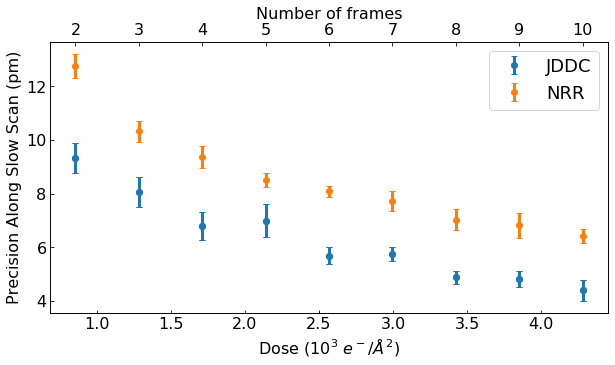

In [5]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Axes1: bottom x axis, for plot, in unit electron dose
ax1.errorbar(nframes*0.428,prec_jddc[:,2]*21.5,yerr = prec_jddc[:,3]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
ax1.errorbar(nframes*0.428,prec_nrr[:,2]*21.5,yerr = prec_nrr[:,3]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='NRR')
ax1.tick_params(labelsize=16, direction='in')
legend = ax1.legend(fontsize=18)

ax1.set_xlabel('Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax1.set_ylabel('Precision Along Slow Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

# Axis 2, on top, for display only, in unit of number of frames
ax2 = ax1.twiny()
ax2.errorbar(nframes,prec_jddc[:,2]*21.5,yerr = prec_jddc[:,3]/np.sqrt(10)*21.5,fmt='o',capsize=3, elinewidth=3,label='JDDC')
# ax2.set_xticklabels(labels,fontsize=16)
ax2.tick_params(labelsize=16, direction='in')
ax2.set_xlabel('Number of frames',fontsize=16)

In [ ]:
# Convert colormap into plots
px_dwelltime = [0.5,1,2,4,6,8,10,12]
px_dwelltime = np.asarray(px_dwelltime)
fig, ax1 = plt.subplots(figsize=(10,5))

# Axes2: top x axis, in unit of frame dose, the actual axis for the plot
ax2 = ax1.twiny()
TotalDose = [50,100,150,200,250] # all the total dose that will be used
for i in range(len(TotalDose)):
#     ax2.errorbar(np.asarray(px_dwelltime)*2.485,prec[i,:,0]*21.8,yerr=prec_std[i,:,0]*21.8/sqrt(5),fmt='o',
#                  label='{:.1f}'.format(TotalDose[i]*0.0485),capsize=3, elinewidth=3)
    ax1.errorbar(np.asarray(px_dwelltime),prec[i,:,0]*21.8,yerr=prec_std[i,:,0]*21.8/sqrt(5),fmt='o',
                 label='{:.1f}'.format(TotalDose[i]*0.0485),capsize=3, elinewidth=3)
legend = ax1.legend(fontsize=14,loc='upper center',ncol=2, title="Total dose ($x10^5$ $e^-$/$\AA^2$)")
legend.get_title().set_fontsize('14')
ax2.tick_params(labelsize=16,direction='in')
ax2.set_xlabel('Frame Dose ($10^3$ $e^-$/$\AA^2$)',fontsize=16)
ax2.set_ylim([2.0,5.5])

# Axes1: bottom x axis, for display only, in unit of pixel dwell time
ax1.tick_params(direction='in')
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = ['','0','5','10','15','20','25','30']
ax2.set_xticklabels(labels,fontsize=16)
ax2.set_xlim([-0.25,31.25])
ax1.tick_params(labelsize=16)
plt.xticks(fontsize=16)
ax1.set_xlim([-0.1,12.5]) # set x limits so that zeros are aligned and 10 on bottom axis is aligned with last group of data
ax1.set_xlabel('Pixel dwell time (\u03BCs)',fontsize=16)
ax1.set_ylabel('Precision Along Slow Scan (pm)',fontsize=16) # y label belongs to axis 1 as it was initialized at beginning

# JDDC find precision

In [3]:
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))

    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140) & (array_int>0))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
    hist_bin = np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2)

    fig = plt.subplots(figsize=(6,2))
    plt.hist(array_int, bins=hist_bin)
    plt.title('Peak Intensity Histogram')

#     hist, bin_edges = np.histogram(array_int,bins=np.arange(np.amin(array_int)+0.5,np.amax(array_int),0.2), density=True)
#     threshold = bin_edges[argmin(hist)]
    threshold = np.sort(array_int)[-53]
    print(threshold)
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]
    
    fig = plt.subplots(figsize=(2,2))
    plt.scatter(array_x1,array_y1)

    return FindXStd(array_x1,array_y1,separation), FindYStd(array_x1,array_y1,separation)

In [4]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
#     fig = plt.subplots(figsize=(6,2))
#     plt.hist(y_sep, bins='auto')
#     plt.title('Hist along y, std= '+str(y_std))
    return y_std

In [5]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
#     fig = plt.subplots(figsize=(6,2))
#     plt.hist(x_sep, bins='auto')
#     plt.title('Hist along x, std= '+str(x_std))
    return x_std

## NRR precision part

In [33]:
def LoadImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return np.transpose(img)

In [34]:
def LoadNumSamples(path):
    # crop image accroding to numsamples
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/numSamples.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
    # print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
    # print(width, height)
    # print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    nSamples = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            nSamples[irow,icol] = struct.unpack('d',read_bytes)[0]

    nSamples = np.heaviside(nSamples-np.amax(nSamples),1)

#     plt.imshow(nSamples)
#     plt.colorbar()
    return np.transpose(nSamples)

In [35]:
# Calculate precision (std) from 2D Gaussian fitting
def PrecisionFromFitting(img,nSamples):
    fit_window_size = 4  # half window size
    image_max = ndi.maximum_filter(img, size=7, mode='constant')
    coordinates = peak_local_max(img, min_distance=10)
#     plt.imshow(img)
    # plt.scatter(coordinates[:,0],coordinates[:,1])

    peaks_x_fit = []
    peaks_y_fit = []

    for i in range(coordinates.shape[0]):

        x = int(coordinates[i][1])
        y = int(coordinates[i][0])
        if nSamples[y,x] == 0:
            continue

        if x >=fit_window_size and y>=fit_window_size:
            patch = img[y-fit_window_size:y+fit_window_size,x-fit_window_size:x+fit_window_size]
            patch = patch - amin(patch)
            bg = 0

            # parameters are in the order of : background, height, cx, cy, wx, wy
            guess = (bg,patch[fit_window_size,fit_window_size]-bg,fit_window_size, fit_window_size, 3, 3)
            bounds = ([0,0,0,0,1,1],[np.inf,np.inf,fit_window_size*2,fit_window_size*2,fit_window_size*2,fit_window_size*2])
            param = fitGaussianx2(patch, guess, bounds)

            peaks_x_fit.append(param[2]+x-fit_window_size)
            peaks_y_fit.append(param[3]+y-fit_window_size)

    plt.scatter(peaks_x_fit, peaks_y_fit,c='r')
    # separations are currently hard coded as 19px, returned values are precision in pixels
    xprec = FindXStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    yprec = FindYStd(np.asarray(peaks_x_fit),np.asarray(peaks_y_fit),19)
    return xprec, yprec

In [29]:
def FindYStd(array_x1_copy,array_y1_copy,separation):
    y_sep = []
    while array_x1_copy.size != 0:
        x_cor = array_x1_copy[0]
        index = np.where((array_x1_copy<x_cor+3) & (array_x1_copy>x_cor-3))
        array_y_sub = array_y1_copy[index]
        array_y_sub = np.sort(array_y_sub)
        for i in range(array_y_sub.shape[0]-1):
            spacing = array_y_sub[i+1] - array_y_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                y_sep.append(spacing)
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    y_std = np.std(np.asarray(y_sep))
    return y_std

In [30]:
def FindXStd(array_x1_copy,array_y1_copy,separation):
    x_sep = []
    while array_x1_copy.size != 0:
        y_cor = array_y1_copy[0]
        index = np.where((array_y1_copy<y_cor+3) & (array_y1_copy>y_cor-3))
        array_x_sub = array_x1_copy[index]
        array_x_sub = np.sort(array_x_sub)
        for i in range(array_x_sub.shape[0]-1):
            spacing = array_x_sub[i+1] - array_x_sub[i]
            if (spacing < separation + 5) & (spacing > separation -5):
                x_sep.append(array_x_sub[i+1] - array_x_sub[i])
        array_x1_copy = np.delete(array_x1_copy,index)
        array_y1_copy = np.delete(array_y1_copy,index)

    x_std = np.std(np.asarray(x_sep))
    return x_std

In [31]:
def fitGaussianx2(data, guess, bounds):
    x = np.linspace(0, data.shape[1]-1, data.shape[1])
    y = np.linspace(0, data.shape[0]-1, data.shape[0])
    x, y = np.meshgrid(x, y)
    xdata_tuple = (x,y)
    popt, pcov = optimize.curve_fit(gaussianx2, xdata_tuple, data.ravel(), p0=guess,bounds=bounds,method='trf',verbose=0,maxfev=100000)
    return popt

In [32]:
def gaussianx2(xdata_tuple,bg,height, center_x, center_y, width_x, width_y):

    (x, y) = xdata_tuple
    width_x = float(width_x)
    width_y = float(width_y)
    g = height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)+bg
    return g.ravel()

# Functions not in use anymore

In [14]:
# Old precision calculation function using csv file, not in use here
def FindPrecision(csvFileName,txtFileName,threshold,separation):
    start = 0
    with open(csvFileName) as csvfile:
        file=csv.reader(open(csvFileName,'r'))
        peaks_x = []
        peaks_y = []
        for row in file:
            if start == 0:
                start = 1
                continue
            peaks_x.append(float(row[0]))
            peaks_y.append(float(row[1]))

    with open(txtFileName) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content];

    peaks_int = []
    for i in range(len(peaks_x)):
        peaks_int.append(float(content[i*3+2]))
        
    array_x = np.asarray(peaks_x)
    array_y = np.asarray(peaks_y)
    array_int = np.asarray(peaks_int)
    index = np.where((array_x>10) & (array_x<140) & (array_y > 10) & (array_y < 140))
    array_x = array_x[index]
    array_y = array_y[index]
    array_int = array_int[index]
        
    lattice1 = np.where(array_int>threshold)
    array_x1 = array_x[lattice1]
    array_y1 = array_y[lattice1]
    array_int1 = array_int[lattice1]

    return FindYStd(array_x1,array_y1,separation),FindXStd(array_x1,array_y1,separation)